IMPORT NECCESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import streamlit as st

SET THE PAGE TITLE AND HEADER FOR STREAMLIT

In [2]:
st.set_page_config(page_title="Email Classifier", page_icon=":email:", layout="wide")
st.title("Email Classifier")

2023-04-03 16:52:18.238 
  command:

    streamlit run C:\Users\SREENATH\anaconda3\envs\Email_Spam\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

READ THE DATA FROM CSV FILE STORED IN DIRECTORY

In [3]:
df = pd.read_csv("emails.csv")
st.write("About the Dataset", df.describe())
st.write("Shape of the dataset",df.shape)

CLEAND AND PREPROCESS THE DATA

In [4]:
df = df.replace(r'[^\d.]+', value=float('nan'), regex=True)
df.fillna(0, inplace=True)
df = df.astype(int)

TARGET VARIABLE VISUALIZATION

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

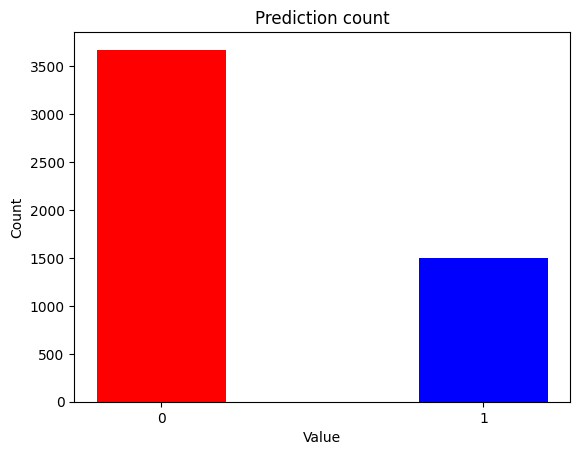

In [5]:
pred = pd.Series(df["Prediction"])
value_count = pred.value_counts()
a = value_count.index
b = value_count.values
colors = ["red", "blue"]
plt.bar(a, b, color=colors, width=0.4)
plt.xticks(value_count.index, ['0', '1'])
plt.xlabel("Value")
plt.ylabel("Count")
plt.title("Prediction count")
st.pyplot(plt)

REMOVE STOP WORDS FROM FEATURE SET

In [6]:
nltk.download('stopwords')
stopword = df.columns.isin(stopwords.words('english'))
no_stopword = df.loc[:, ~stopword].copy()
no_stopword.drop(columns="Email No.", inplace=True)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SREENATH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


SPLIT THE DATA INTO TRAIN SET AND TEST SET,THEN SCALE THE DATA

In [7]:
x = no_stopword.drop(columns="Prediction")
y = no_stopword['Prediction']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=40)
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(x_train)
x_train = scaler.fit_transform(x_train)

MODELS WE ARE USING!

MULTINOMIAL NAIVE BAYES (TRAIN THE MODEL AND PREDICT THE TARGET VARIABLE USING TEST DATA)

In [8]:
nb_cls = MultinomialNB()
nb_cls.fit(x_train, y_train)
x_test = scaler.transform(x_test)
y_pred_nb = nb_cls.predict(x_test)

#Accuracy score of the Naive Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
st.write("Accuracy score of the Naive Bayes model is:", accuracy_nb)

SUPPORT VECTOR CLASSIFIER (TRAIN THE MODEL AND PREDICT THE TARGET VARIABLE USING TEST DATA)

In [9]:
svm_cls = SVC(kernel='rbf')
svm_cls.fit(x_train, y_train)
x_test = scaler.transform(x_test)
y_pred_svm = svm_cls.predict(x_test)

# Calculate the accuracy score of the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
st.write("Accuracy score of the SVM model is:", accuracy_svm)

C:\Users\SREENATH\anaconda3\envs\Email_Spam\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


RANDOM FOREST CLASSIFIER(TRAIN THE MODEL AND PREDICT THE TARGET VARIABLE USING TEST DATA)

In [10]:
rf_cls = RandomForestClassifier(n_estimators=500, random_state=40)
rf_cls.fit(x_train, y_train)
x_test = scaler.transform(x_test)
y_pred_rf = rf_cls.predict(x_test)

# Calculate the accuracy score of the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
st.write("Accuracy score of the Random Forest model is:", accuracy_rf)

C:\Users\SREENATH\anaconda3\envs\Email_Spam\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


CREATING A DATAFRAME WITH THE ACCURACY OF THE MODELS

In [11]:
df = pd.DataFrame({
    'Model': ['Naive Bayes', 'SVM', 'Random Forest'],
    'Accuracy Score': [accuracy_nb, accuracy_svm, accuracy_rf]
})


# Set the index of the DataFrame to '
df.set_index('Model', inplace=True)

fig, ax = plt.subplots()
ax.bar(df.index, df['Accuracy Score'])
ax.set_title("Accuracy Scores for Email Classification Models")
ax.set_ylabel("Accuracy Score")
st.pyplot(fig)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

DISPLAY THE CONFUSION MATRIX AND CLASSIFICATION REPORT FOR MODELS IN STREAMLIT

In [12]:
for model, y_pred in [('Naive Bayes', y_pred_nb), ('SVM', y_pred_svm), ('Random Forest', y_pred_rf)]:
    st.write(f"Confusion matrix for the {model} model:")
    st.write(confusion_matrix(y_test, y_pred))

    st.write(f"Classification report for the {model} model:")
    st.write(classification_report(y_test, y_pred))

C:\Users\SREENATH\anaconda3\envs\Email_Spam\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SREENATH\anaconda3\envs\Email_Spam\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SREENATH\anaconda3\envs\Email_Spam\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)